# Setup

In [13]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle
import sys
from pathlib import Path
import matplotlib.pyplot as plt
# Add the src directory to the path
# sys.path.insert(0, '/Users/yew/code/neon-agbd/src')


# from src.main import compute_site_biomass_full, ALL_SITES

In [10]:
dpids= ['DELA','LENO','TALL','BONA','DEJU','HEAL','SRER','SJER','SOAP',
              'TEAK','CPER','NIWO','RMNP','DSNY','OSBS','JERC','PUUM','KONZ',
              'UKFS','SERC','HARV','UNDE','BART','JORN','DCFS','NOGP','WOOD',
              'GUAN','LAJA','GRSM','ORNL','CLBJ','MOAB','ONAQ','BLAN','MLBS',
              'SCBI','ABBY','WREF','STEI','TREE','YELL']

plot_list = []

for site_id in dpids:
	site_file = f'/Users/yew/code/neon-agbd/output/{site_id}.pkl'
	with open(site_file, 'rb') as f:
		site_dict = pickle.load(f)
		plot_list.append(site_dict['plot_biomass'])

plot_biomass_df = pd.concat(plot_list, ignore_index=True)
plot_biomass_df

,siteID,plotID,year,plotArea_m2,tree_AGBJenkins,tree_AGBChojnacky,tree_AGBAnnighofer,n_trees,small_woody_AGBJenkins,small_woody_AGBChojnacky,small_woody_AGBAnnighofer,n_small_woody_total,n_small_woody_measured,n_unaccounted_trees,total_AGBJenkins,total_AGBChojnacky,total_AGBAnnighofer,growth,growth_cumu
0,DELA,DELA_001,2015,1600.0,45.409061,44.406373,NaN,22,0.612766,0.630304,0.182765,28,18,1,46.021827,45.036676,0.182765,NaN,5.349565
1,DELA,DELA_001,2019,1600.0,66.244231,64.395718,NaN,22,0.949005,0.983348,0.189293,29,18,1,67.193235,65.379065,0.189293,5.292852,5.349565
2,DELA,DELA_001,2022,1600.0,82.694043,80.172850,NaN,23,0.797422,0.823955,0.182765,28,18,1,83.491464,80.996805,0.182765,5.432743,5.349565
3,DELA,DELA_002,2015,1600.0,19.163453,18.812812,NaN,18,1.160753,1.321465,NaN,21,16,1,20.324206,20.134276,0.000000,NaN,1.803042
4,DELA,DELA_002,2019,1600.0,27.295091,26.750160,NaN,18,2.213556,2.477087,NaN,32,18,1,29.508647,29.227247,0.000000,2.296110,1.803042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,YELL,YELL_061,2021,1600.0,57.389788,54.643202,NaN,9,0.126688,0.109647,2.315183,31,13,1,57.516476,54.752848,2.315183,1.631986,7.094329
5681,YELL,YELL_061,2022,1600.0,77.843373,73.977564,NaN,9,0.147617,0.128462,2.256751,28,12,1,77.990990,74.106026,2.256751,20.474514,7.094329
5682,YELL,YELL_061,2023,1600.0,79.844777,75.889784,NaN,9,0.172017,0.150159,2.422369,28,12,1,80.016794,76.039943,2.422369,2.025804,7.094329
5683,YELL,YELL_062,2019,1600.0,14.383323,13.127548,NaN,9,0.799640,0.671110,0.982629,43,15,0,15.182963,13.798658,0.982629,NaN,0.759498


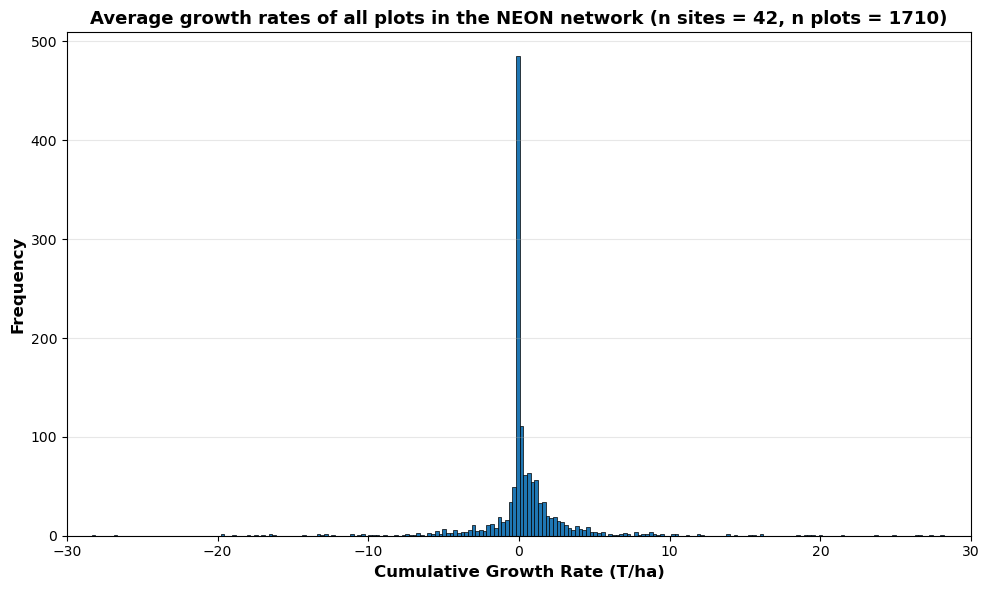


Summary:
  Number of sites: 42
  Number of plots: 1710
  Growth rate range: -177.96 to 66.89 T/ha
  Mean growth rate: 0.30 T/ha
  Median growth rate: 0.00 T/ha


In [20]:
hist_df = plot_biomass_df.drop_duplicates(subset=['plotID']).copy()

# Calculate number of unique sites and plots
n_sites = hist_df['siteID'].nunique()
n_plots = hist_df['plotID'].nunique()

# Create histogram with black edges
plt.figure(figsize=(10, 6))
plt.hist(hist_df['growth_cumu'], bins=1000, edgecolor='black', linewidth=0.5)
plt.xlim(-30, 30)
plt.xlabel('Cumulative Growth Rate (T/ha)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title(f'Average growth rates of all plots in the NEON network (n sites = {n_sites}, n plots = {n_plots})', 
          fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nSummary:")
print(f"  Number of sites: {n_sites}")
print(f"  Number of plots: {n_plots}")
print(f"  Growth rate range: {hist_df['growth_cumu'].min():.2f} to {hist_df['growth_cumu'].max():.2f} T/ha")
print(f"  Mean growth rate: {hist_df['growth_cumu'].mean():.2f} T/ha")
print(f"  Median growth rate: {hist_df['growth_cumu'].median():.2f} T/ha")

In [14]:
site_id = 'ABBY'
site_file = f'/Users/yew/data/NEON/vst/results2/ABBY.pkl'
with open(site_file, 'rb') as f:
	site_dict = pickle.load(f)

In [5]:
site_dict['vst_perplotperyear']

,uid,namedLocation,date,nonwoodyCollectDate,domainID,siteID,plotID,plotType,nlcdClass,decimalLatitude,...,totalSampledAreaShrubSapling,totalSampledAreaLiana,totalSampledAreaFerns,totalSampledAreaOther,remarks,measuredBy,recordedBy,dataQF,publicationDate,release
0,781f7045-9fc8-43ed-89db-e8d98730ba96,ABBY_063.basePlot.vst,2015-07-23,None,D16,ABBY,ABBY_063,tower,evergreenForest,45.760513,...,800.0,800.0,NaN,800.0,ferns only counted not measured,krian@neoninc.org,krian@neoninc.org,legacyData,20250122T230548Z,RELEASE-2025
1,99516959-46e4-47c3-b124-cbc2eae1b089,ABBY_068.basePlot.vst,2015-07-25,None,D16,ABBY,ABBY_068,tower,evergreenForest,45.760510,...,100.0,800.0,NaN,4.0,Fern nested subplot size of 1 square meter; fe...,shiebert@neoninc.org,krian@neoninc.org,legacyData,20250122T230548Z,RELEASE-2025
2,c91a5422-1c43-4ca0-9530-cd4fc085d5bf,ABBY_065.basePlot.vst,2015-07-27,None,D16,ABBY,ABBY_065,tower,grasslandHerbaceous,45.762196,...,100.0,800.0,NaN,40.0,Fern nested subplot size of 10 square meters; ...,shiebert@neoninc.org,krian@neoninc.org,legacyData,20250122T230548Z,RELEASE-2025
3,2fd8bbaf-e5cf-40ee-bd13-1f28a6873519,ABBY_067.basePlot.vst,2015-07-27,None,D16,ABBY,ABBY_067,tower,evergreenForest,45.760563,...,100.0,800.0,NaN,4.0,Fern nested subplot size of 1 square meter; fe...,lwade@field-ops.org,krian@neoninc.org,legacyData,20250122T230548Z,RELEASE-2025
4,3617b468-8125-4c4d-8d8f-06a5c5c97351,ABBY_066.basePlot.vst,2015-07-28,None,D16,ABBY,ABBY_066,tower,evergreenForest,45.763502,...,400.0,800.0,NaN,400.0,Fern nested subplot size of 100 square meters;...,krian@neoninc.org,krian@neoninc.org,legacyData,20250122T230548Z,RELEASE-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,7a9f3d0a-f79e-4188-8189-bf8968230016,ABBY_061.basePlot.vst,2023-08-28,None,D16,ABBY,ABBY_061,tower,evergreenForest,45.762451,...,400.0,800.0,NaN,12.0,,,,,20250122T231936Z,RELEASE-2025
126,cff5bca0-34ff-4204-8a14-9f1d49a149b4,ABBY_062.basePlot.vst,2023-09-04,None,D16,ABBY,ABBY_062,tower,evergreenForest,45.763476,...,100.0,800.0,NaN,800.0,,,,,20250122T230222Z,RELEASE-2025
127,e23dc25e-3ddc-4e0e-949f-e067d3624d4a,ABBY_063.basePlot.vst,2023-09-05,None,D16,ABBY,ABBY_063,tower,evergreenForest,45.760513,...,400.0,800.0,NaN,NaN,,,,,20250122T230222Z,RELEASE-2025
128,71461447-8c89-4641-bbea-cda65aa18e49,ABBY_070.basePlot.vst,2023-10-05,None,D16,ABBY,ABBY_070,tower,evergreenForest,45.761334,...,400.0,800.0,NaN,800.0,,,,,20250122T230407Z,RELEASE-2025


In [17]:
site_dict['individual_trees']

,siteID,plotID,individualID,year,AGBJenkins,AGBChojnacky,AGBAnnighofer,growth_AGBJenkins,growth_cumu_AGBJenkins,growth_AGBChojnacky,...,corrected_is_dead,gapFilling,scientificName,taxonID,genus,family,taxonRank,pointID,stemDistance,stemAzimuth
0,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00001,2021,21.958470,19.068443,NaN,NaN,NaN,NaN,...,False,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,21,4.6,77.1
1,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00005,2021,56.659165,50.004457,NaN,NaN,NaN,NaN,...,False,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,21,2.9,31.1
2,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2016,0.000000,0.000000,0.0,NaN,0.0,NaN,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
3,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2017,0.000000,0.000000,0.0,0.0,0.0,0.0,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
4,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2018,0.000000,0.000000,0.0,0.0,0.0,0.0,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,ABBY,ABBY_023,NEON.PLA.D16.ABBY.09945,2019,29.413027,NaN,NaN,0.0,0.0,NaN,...,False,ORIGINAL,Prunus emarginata (Douglas ex Hook.) D. Dietr.,PREM,Prunus,Rosaceae,species,51,4.6,230.4
4232,ABBY,ABBY_023,NEON.PLA.D16.ABBY.09946,2016,16.531197,15.376333,NaN,NaN,0.0,NaN,...,False,FILLED,Prunus emarginata (Douglas ex Hook.) D. Dietr.,PREM,Prunus,Rosaceae,species,51,10.1,209.6
4233,ABBY,ABBY_023,NEON.PLA.D16.ABBY.09946,2019,16.531197,15.376333,NaN,0.0,0.0,0.0,...,False,ORIGINAL,Prunus emarginata (Douglas ex Hook.) D. Dietr.,PREM,Prunus,Rosaceae,species,51,10.1,209.6
4234,ABBY,ABBY_023,NEON.PLA.D16.ABBY.09947,2016,14.109269,12.995139,NaN,NaN,0.0,NaN,...,False,FILLED,Prunus emarginata (Douglas ex Hook.) D. Dietr.,PREM,Prunus,Rosaceae,species,51,9.0,213.2


In [18]:
site_dict['individual_trees'][site_dict['individual_trees']['individualID'] == 'NEON.PLA.D16.ABBY.03765']

,siteID,plotID,individualID,year,AGBJenkins,AGBChojnacky,AGBAnnighofer,growth_AGBJenkins,growth_cumu_AGBJenkins,growth_AGBChojnacky,...,corrected_is_dead,gapFilling,scientificName,taxonID,genus,family,taxonRank,pointID,stemDistance,stemAzimuth
2861,ABBY,ABBY_061,NEON.PLA.D16.ABBY.03765,2015,6096.801779,5827.942053,NaN,NaN,0.0,NaN,...,False,FILLED,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,59,1.2,194.3
2862,ABBY,ABBY_061,NEON.PLA.D16.ABBY.03765,2016,6096.801779,5827.942053,NaN,0.0,0.0,0.0,...,False,FILLED,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,59,1.2,194.3
2863,ABBY,ABBY_061,NEON.PLA.D16.ABBY.03765,2017,6096.801779,5827.942053,NaN,0.0,0.0,0.0,...,False,FILLED,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,59,1.2,194.3
2864,ABBY,ABBY_061,NEON.PLA.D16.ABBY.03765,2018,6096.801779,5827.942053,NaN,0.0,0.0,0.0,...,False,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,59,1.2,194.3
2865,ABBY,ABBY_061,NEON.PLA.D16.ABBY.03765,2020,6096.801779,5827.942053,NaN,0.0,0.0,0.0,...,False,FILLED,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,59,1.2,194.3
2866,ABBY,ABBY_061,NEON.PLA.D16.ABBY.03765,2021,6096.801779,5827.942053,NaN,0.0,0.0,0.0,...,False,FILLED,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,59,1.2,194.3
2867,ABBY,ABBY_061,NEON.PLA.D16.ABBY.03765,2022,6096.801779,5827.942053,NaN,0.0,0.0,0.0,...,False,FILLED,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,59,1.2,194.3
2868,ABBY,ABBY_061,NEON.PLA.D16.ABBY.03765,2023,6096.801779,5827.942053,NaN,0.0,0.0,0.0,...,False,FILLED,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,59,1.2,194.3


In [10]:
site_dict['plot_biomass']

,siteID,plotID,year,totalSampledAreaTrees_m2,totalSampledAreaShrubSapling_m2,tree_AGBJenkins,tree_AGBChojnacky,tree_AGBAnnighofer,n_trees,n_filled,...,small_woody_AGBJenkins,small_woody_AGBChojnacky,small_woody_AGBAnnighofer,n_small_woody_total,n_small_woody_measured,n_unaccounted_trees,total_AGBJenkins,total_AGBChojnacky,total_AGBAnnighofer,annual_growth_t-1_to_t
0,ABBY,ABBY_001,2016,400.0,80.0,460.878503,441.711950,NaN,11,2,...,4.059553,3.639194,1.026364,41,18,2,464.938055,445.351144,1.026364,NaN
1,ABBY,ABBY_001,2019,400.0,80.0,474.061524,451.324162,NaN,9,0,...,5.907722,5.305225,0.767186,41,19,2,479.969246,456.629387,0.767186,5.010397
2,ABBY,ABBY_002,2016,400.0,400.0,0.000000,0.000000,0.0,0,0,...,0.239576,0.171649,1.921899,56,50,21,0.239576,0.171649,1.921899,NaN
3,ABBY,ABBY_002,2019,400.0,400.0,0.000000,0.000000,0.0,0,0,...,1.358801,1.129142,1.935243,60,51,21,1.358801,1.129142,1.935243,0.373075
4,ABBY,ABBY_003,2016,400.0,400.0,20.199410,17.882101,NaN,13,0,...,2.263328,1.793880,0.583841,111,53,5,22.462738,19.675981,0.583841,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,ABBY,ABBY_076,2016,800.0,400.0,10.890841,9.593154,NaN,20,20,...,4.259650,3.298399,0.089115,257,70,0,15.150492,12.891553,0.089115,NaN
126,ABBY,ABBY_076,2017,800.0,100.0,11.462596,10.097336,NaN,20,18,...,25.848701,20.810750,0.511141,248,73,0,37.311298,30.908086,0.511141,22.160806
127,ABBY,ABBY_076,2018,800.0,100.0,12.435935,10.965099,NaN,21,20,...,39.187096,32.523383,0.247959,232,68,0,51.623031,43.488483,0.247959,14.311734
128,ABBY,ABBY_076,2019,800.0,800.0,13.479685,11.905058,NaN,21,21,...,6.939774,5.856324,0.030995,224,68,0,20.419459,17.761382,0.030995,-31.203572


## Interactive version with Plotly (hover to see plotID)

In [15]:
import plotly.express as px

def plot_site_biomass(site_id, site_file):
    """
    Create an interactive plot of above-ground biomass over time for a NEON site.
    
    Parameters
    ----------
    site_id : str
        Four-character NEON site code (e.g., 'ABBY', 'DELA')
    site_file : str
        Path to the pickle file containing site data
    """
    # Load the site data
    with open(site_file, 'rb') as f:
        site_dict = pickle.load(f)
    
    # Get plot biomass data
    o_plots = site_dict['plot_biomass'].copy()
    
    # Rename column for easier access in hover_data
    o_plots['growth_rate'] = o_plots['annual_growth_t-1_to_t']
    
    # Calculate number of unique plots
    n_plots = o_plots['plotID'].nunique()
    
    # Create interactive plot with Plotly
    fig = px.line(o_plots, 
                  x='year', 
                  y='total_AGBJenkins',
                  color='plotID',
                  markers=True,
                  labels={'total_AGBJenkins': 'AGB Jenkins (T/ha)',
                          'year': 'Year',
                          'plotID': 'Plot ID',
                          'growth_rate': 'Growth Rate (T/ha)'},
                  title=f'Above-Ground Biomass Over Time - Site {site_id} (n plots = {n_plots})',
                  hover_data={
                      'plotID': True, 
                      'year': True, 
                      'total_AGBJenkins': ':.2f',
                      'n_trees': True,
                      'n_unaccounted_trees': True,
                      'growth_rate': ':.2f',
                      'n_small_woody_measured': True,
                      'n_small_woody_total': True
                  })
    
    # Customize layout
    fig.update_traces(marker=dict(size=8), line=dict(width=2))
    fig.update_layout(
        height=700,
        width=1000,
        hovermode='closest',
        legend=dict(
            orientation="h",
            yanchor="top",
            y=-0.15,
            xanchor="center",
            x=0.5,
            title="Plot ID"
        ),
        xaxis=dict(title_font=dict(size=14, family='Arial, bold')),
        yaxis=dict(title_font=dict(size=14, family='Arial, bold')),
        title_font=dict(size=16, family='Arial, bold'),
        margin=dict(b=150)  # Add bottom margin for legend
    )
    
    fig.show()
    
    print(f"\nInteractive plot created for site {site_id}!")
    print(f"  Number of plots: {n_plots}")
    print(f"  Year range: {o_plots['year'].min()} - {o_plots['year'].max()}")
    print(f"\nHover over points to see details.")
    print(f"You can also: zoom, pan, select regions, and toggle plot visibility by clicking legend items.")
    
    return fig


# Example usage:
site_id = 'ABBY'
site_file = f'/Users/yew/data/NEON/vst/results2/{site_id}.pkl'
plot_site_biomass(site_id, site_file)


Interactive plot created for site ABBY!
  Number of plots: 34
  Year range: 2015 - 2023

Hover over points to see details.
You can also: zoom, pan, select regions, and toggle plot visibility by clicking legend items.


In [26]:
trees = site_dict["individual_trees"]
trees[trees['individualID'] == 'NEON.PLA.D16.ABBY.00012']

,siteID,plotID,individualID,year,AGBJenkins,AGBChojnacky,AGBAnnighofer,growth_AGBJenkins,growth_cumu_AGBJenkins,growth_AGBChojnacky,...,corrected_is_dead,gapFilling,scientificName,taxonID,genus,family,taxonRank,pointID,stemDistance,stemAzimuth
2,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2016,0.000000,0.000000,0.0,NaN,1723.845551,NaN,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
3,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2017,0.000000,0.000000,0.0,0.000000,1723.845551,0.000000,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
4,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2018,0.000000,0.000000,0.0,0.000000,1723.845551,0.000000,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
5,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2019,31891.142688,31358.258255,0.0,31891.142688,1723.845551,31358.258255,...,False,FILLED,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
6,ABBY,ABBY_075,NEON.PLA.D16.ABBY.00012,2021,0.000000,0.000000,0.0,-15945.571344,1723.845551,-15679.129127,...,True,ORIGINAL,Pseudotsuga menziesii (Mirb.) Franco var. menz...,PSMEM,Pseudotsuga,Pinaceae,variety,41,7.4,348.5
